In [1]:
import ira
from tqdm.notebook import tqdm
%alphalab dark

from c3p.models.utils import load_all_contracts_data, contracts_for, bitmex_contract_expiration
from alpha.utils.tick_loaders import load_data

Reloaded /usr/local/envs/ira_p36/lib/python3.6/site-packages/ira/experimental/c_simulator_core.pyx


In [7]:
def prepare_data(underlying):
    ctrs = contracts_for(underlying)
    symbols = {f'BITMEXH:{x.name}' for x in ctrs} | {f'BITMEXH:{underlying}',}
    return mstruct(
        underlying = underlying, ctrs = ctrs, symbols=symbols, 
        data = load_data(*symbols))

In [10]:
def plot_statistics(sx):
    for i, c in enumerate(sx.ctrs, 1):
        xd = retain_columns_and_join(sx.data[[c.name, sx.underlying]].ohlc('1h'), 'close').dropna()
        f = xd[c.name]
        u = xd[sx.underlying]
        dp = f - u
        dp = dp - dp.iloc[0]
        sbp(53, i); 
        plt.plot(dp, label=c.name); plt.legend()
        plt.axhline(0, ls='--', c='g')

In [8]:
d_xbt = prepare_data('XBTUSD')
d_eth = prepare_data('ETHUSD')
d_ltc = prepare_data('LTCUSD')

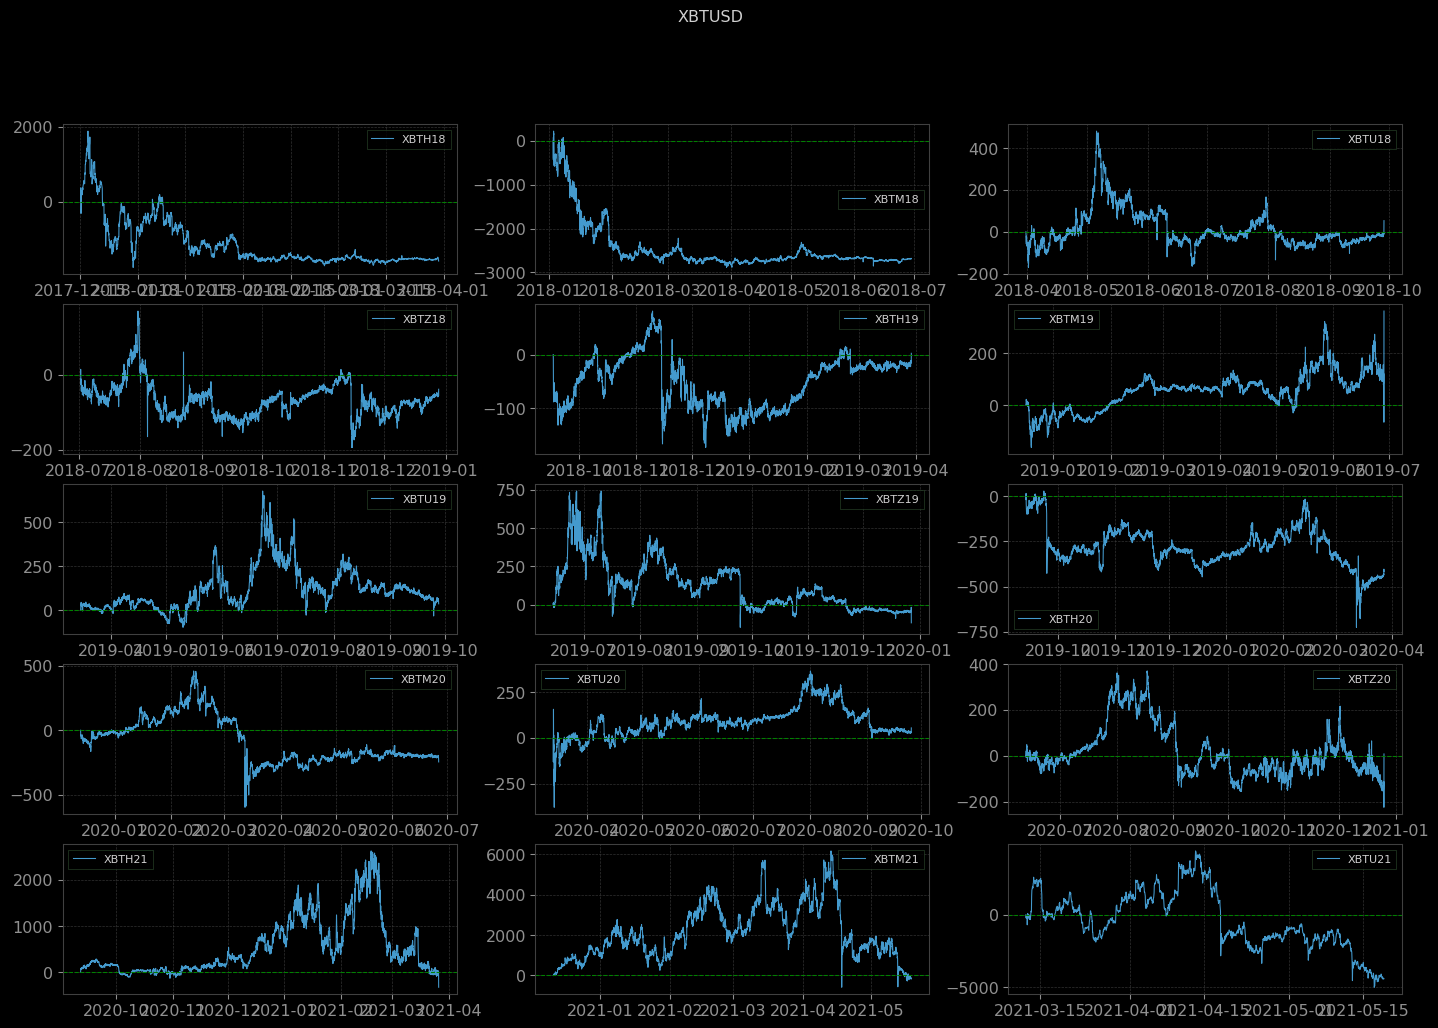

In [11]:
fig(18, 12)
plot_statistics(d_xbt)
plt.suptitle(d_xbt.underlying);

In [ ]:
fig(18, 12)
plot_statistics(d_eth)
plt.suptitle(d_eth.underlying);

In [21]:
sx = d_eth
for i, c in enumerate(sx.ctrs, 1):
    xd = retain_columns_and_join(sx.data[[c.name, sx.underlying]].ohlc('1h'), 'close').dropna()
    print(xd)
    f = xd[c.name]
    u = xd[sx.underlying]
    dp = f - u
    dp = dp - dp.iloc[0]


In [26]:
retain_columns_and_join(sx.data[[c.name, sx.underlying]].ohlc('1h'), 'close').dropna()

,ETHH18,ETHUSD
time,,


In [27]:
d_eth.data['ETHUSD']

TickData(instrument='BITMEXH:ETHUSD', symbol='ETHUSD', exchange='BITMEXH', data=                         open      high       low     close  volume
time                                                               
2018-08-02 09:04:00   210.500   210.500   210.500   210.500       2
2018-08-02 09:05:00   210.500   410.000   210.500   410.000       3
2018-08-02 09:06:00   210.525   405.025   210.525   405.025      10
2018-08-02 09:07:00   405.050   431.000   405.050   430.950      11
2018-08-02 09:08:00   430.500   430.500   429.000   429.000       7
...                       ...       ...       ...       ...     ...
2021-05-18 23:55:00  3386.200  3396.525  3383.775  3384.075    1128
2021-05-18 23:56:00  3384.650  3395.025  3384.650  3387.200     974
2021-05-18 23:57:00  3387.200  3395.875  3384.450  3385.725    1092
2021-05-18 23:58:00  3385.725  3387.875  3382.225  3384.175     976
2021-05-18 23:59:00  3384.175  3387.375  3380.875  3382.075     757

[1469189 rows x 5 columns])

In [28]:
d_eth.data['ETHH18']

TickData(instrument='BITMEXH:ETHH18', symbol='ETHH18', exchange='BITMEXH', data=                         open      high       low     close  volume
time                                                               
2017-12-15 05:57:00  0.515000  0.515000  0.515000  0.515000       1
2017-12-15 05:58:00  0.045000  0.045000  0.045000  0.045000       1
2017-12-15 05:59:00  0.045000  0.045000  0.045000  0.045000       1
2017-12-15 06:06:00  0.049000  0.049000  0.049000  0.049000       1
2017-12-15 06:10:00  0.047500  0.047500  0.047500  0.047500       1
...                       ...       ...       ...       ...     ...
2018-03-30 11:56:00  0.055895  0.055895  0.055795  0.055795      12
2018-03-30 11:57:00  0.055795  0.055795  0.055750  0.055785       6
2018-03-30 11:58:00  0.055775  0.055775  0.055775  0.055775       5
2018-03-30 11:59:00  0.055775  0.055775  0.055775  0.055775       5
2018-03-30 12:00:00  0.055775  0.055775  0.055775  0.055775       1

[139915 rows x 5 columns])

In [ ]:
d_eth.data['ETHH18']